<a href="https://colab.research.google.com/github/jen0707/PythonDataA/blob/main/MatplotlibAndSeaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
titanic = pd.read_csv('titanic_selena.csv')

survived_counts = titanic['Survived'].value_counts()
survived_counts

,count
Survived,
0,549
1,342


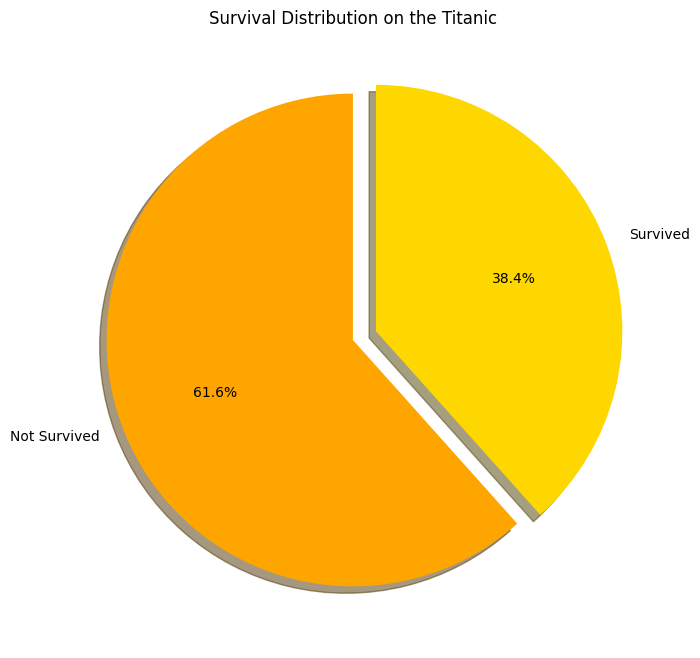

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], colors=['orange', 'gold'], autopct='%0.1f%%', startangle=90, shadow=True, explode=(0,0.1))
plt.title('Survival Distribution on the Titanic')
plt.show()

In [ ]:
import pandas as pd
titanic = pd.read_csv('titanic_selena.csv')

# 결측치 처리
titanic = titanic.dropna(subset=['Age'])
print(titanic.info())

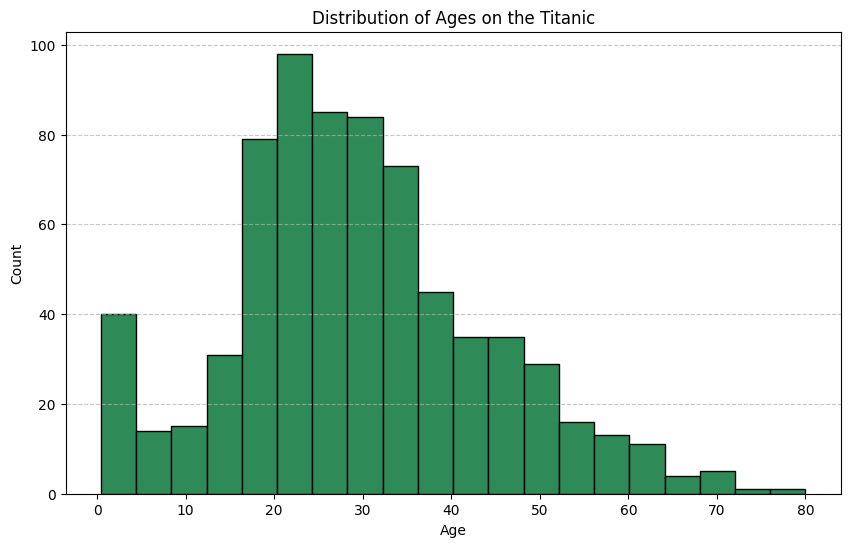

In [3]:
plt.figure(figsize=(10, 6)) # 그래프 배경 설정
plt.hist(titanic['Age'], bins=20, color='seagreen', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages on the Titanic')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
titanic = titanic.dropna(subset=['Age', 'Fare']) # 결측치 처리

In [5]:
correlation_matrix = titanic.drop('PassengerId', axis=1).corr(numeric_only=True) # 숫자 데이터 간의 상관관계(.corr)
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


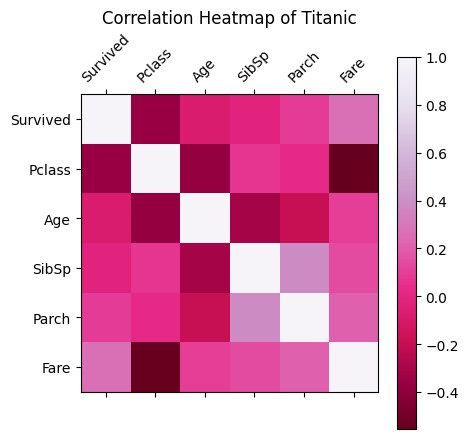

In [6]:
# 히트맵
plt.matshow(correlation_matrix, cmap='PuRd_r')
plt.colorbar()

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title('Correlation Heatmap of Titanic')
plt.show()

<Axes: >

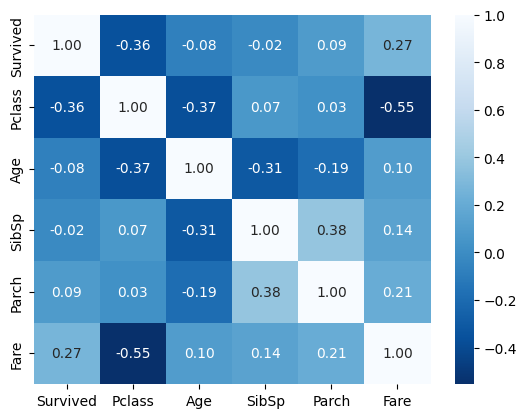

In [7]:
#SeaBorn으로 해보자
import seaborn as sns
correlation_matrix

sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', fmt='.2f') # annot : 수치 표시, fmt : 소수점 아래 자릿수

In [8]:
# pd.cut()을 이용하여 구간 나눠 전처리
age_groups = pd.cut(titanic['Age'], bins=range(0, 81, 5)) # 0부터 81까지 5단위로 cut
age_groups

,Age
0,"(20, 25]"
1,"(35, 40]"
2,"(25, 30]"
3,"(30, 35]"
4,"(30, 35]"
...,...
885,"(35, 40]"
886,"(25, 30]"
887,"(15, 20]"
889,"(25, 30]"


In [10]:
# groupby를 이용해 Age, Survived 기준으로 그룹화
survived_counts = titanic.groupby([age_groups, 'Survived']).size().unstack() # size를 통해 개수 세기, unstack을 통해 행에서 열로 변환
survived_counts.reset_index() # reset_index()를 통해 원하는 데이터 형태로 바꿔준다

<ipython-input-10-303dcca6d3e0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_counts = titanic.groupby([age_groups, 'Survived']).size().unstack() # size를 통해 개수 세기, unstack을 통해 행에서 열로 변환


Survived,Age,0,1
0,"(0, 5]",13,31
1,"(5, 10]",13,7
2,"(10, 15]",8,11
3,"(15, 20]",63,33
4,"(20, 25]",80,42
5,"(25, 30]",66,42
6,"(30, 35]",47,41
7,"(35, 40]",39,28
8,"(40, 45]",30,17
9,"(45, 50]",23,16


In [11]:
survived_counts.index.astype(str)
survived_counts[1] # 0 : 사망자, 1 : 생존자 / column index를 가져옴

,1
Age,
"(0, 5]",31
"(5, 10]",7
"(10, 15]",11
"(15, 20]",33
"(20, 25]",42
"(25, 30]",42
"(30, 35]",41
"(35, 40]",28
"(40, 45]",17


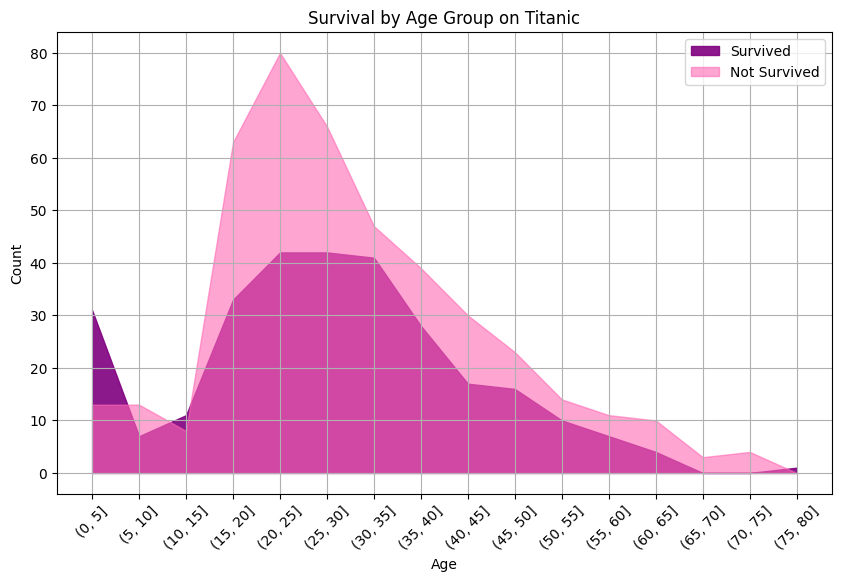

In [12]:
plt.figure(figsize=(10, 6))

plt.fill_between(survived_counts.index.astype(str), survived_counts[1], color='purple', alpha=0.9, label='Survived')
plt.fill_between(survived_counts.index.astype(str), survived_counts[0], color='hotpink', alpha=0.6, label='Not Survived')

plt.title('Survival by Age Group on Titanic')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45) # 돌려줘야 안 겹침
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# 결측치 처리
titanic = titanic.dropna(subset=['Age'])
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
None


<ipython-input-14-38725d4a3540>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([titanic[titanic['Pclass']== 1]['Age'],


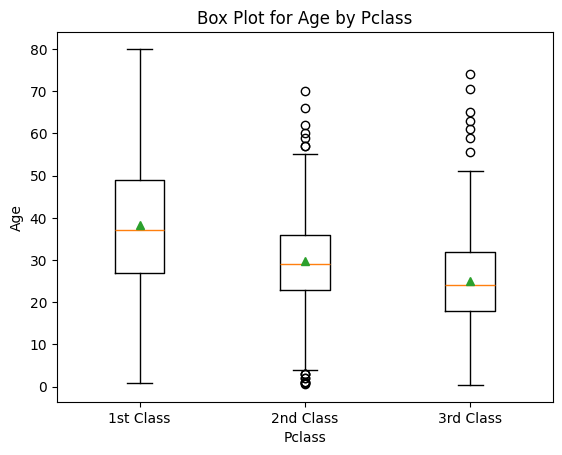

In [14]:
# Box-Plot: 범주형의 분포도
# 조건식 사용: Pclass가 1인 사람들의 나이 ...
plt.boxplot([titanic[titanic['Pclass']== 1]['Age'],
             titanic[titanic['Pclass']== 2]['Age'],
             titanic[titanic['Pclass']== 3]['Age']],
            labels=['1st Class', '2nd Class', '3rd Class'],
            showmeans=True)

plt.title('Box Plot for Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

In [15]:
# 결측치 평균으로 처리
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
None


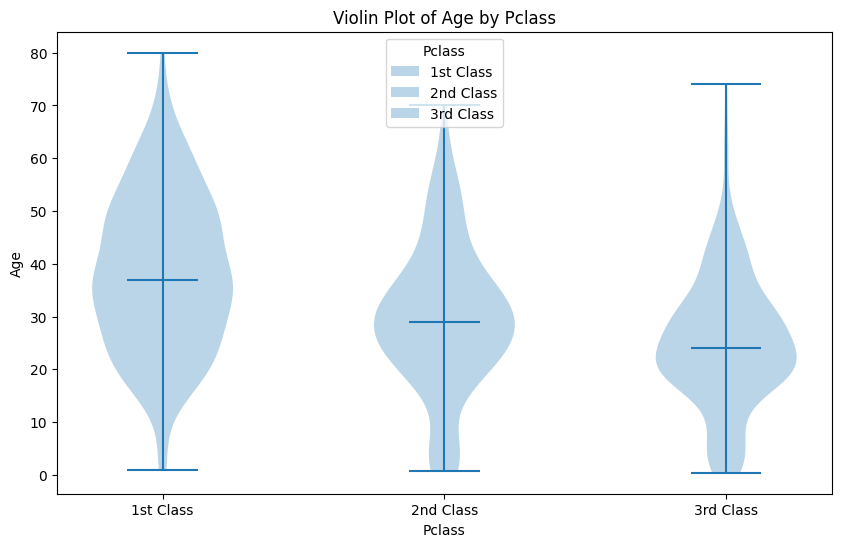

In [16]:
# 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))

# showmeans=False: 평균값을 표시X,
# showmedians=True: 중앙값을 표시
violin_plot = plt.violinplot([titanic[titanic['Pclass'] == 1]['Age'],
                              titanic[titanic['Pclass'] == 2]['Age'],
                              titanic[titanic['Pclass'] == 3]['Age']],
                             showmeans=False, showmedians=True)

plt.title('Violin Plot of Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(violin_plot['bodies'], ['1st Class', '2nd Class', '3rd Class'], title='Pclass')
plt.show()

In [18]:
# 전처리
# groupby를 통해 각 부모와 자녀의 수에 대한 요금의 평균, 표준편차
fare_means = titanic.groupby('Parch')['Fare'].mean()
print(fare_means, '\n')

fare_std = titanic.groupby('Parch')['Fare'].std()
print(fare_std)

Parch
0    27.283276
1    48.273714
2    67.175062
3    25.951660
4    84.968750
5    32.550000
6    46.900000
Name: Fare, dtype: float64 

Parch
0     44.289567
1     65.677489
2     70.456533
3      7.862611
4    118.731099
5      4.101134
6           NaN
Name: Fare, dtype: float64


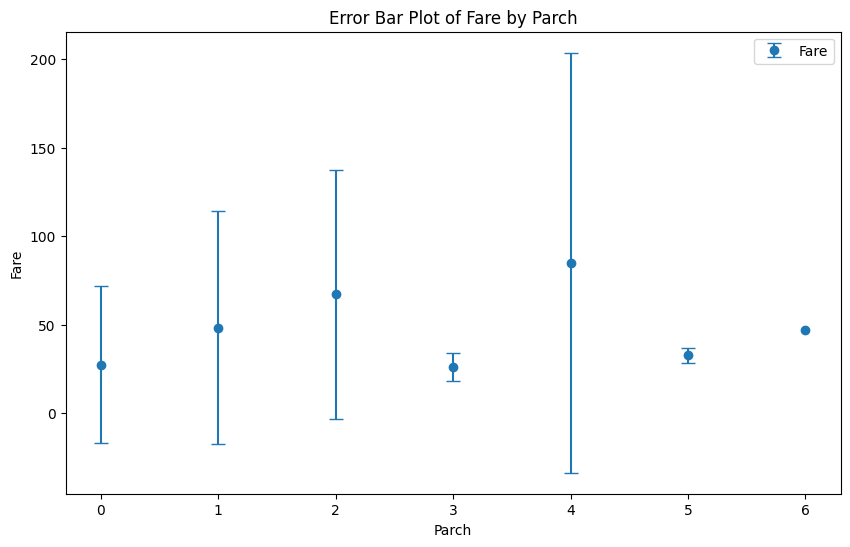

In [19]:
# error bar
plt.figure(figsize=(10, 6))

plt.errorbar(fare_means.index, fare_means, yerr=fare_std, fmt='o', capsize=5, capthick=1, label='Fare')

plt.title('Error Bar Plot of Fare by Parch')
plt.xlabel('Parch')
plt.ylabel('Fare')
plt.xticks(fare_means.index)
plt.legend()
plt.show()

# **그래프 한꺼번에 그리기**

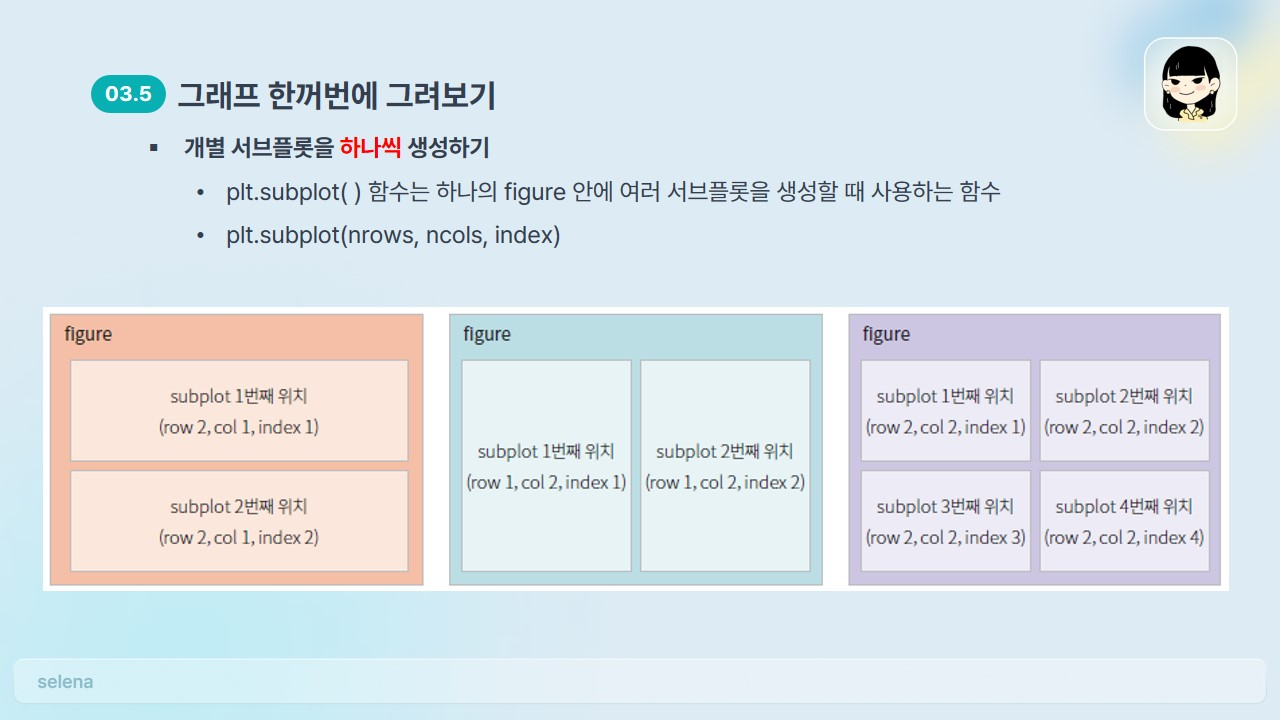

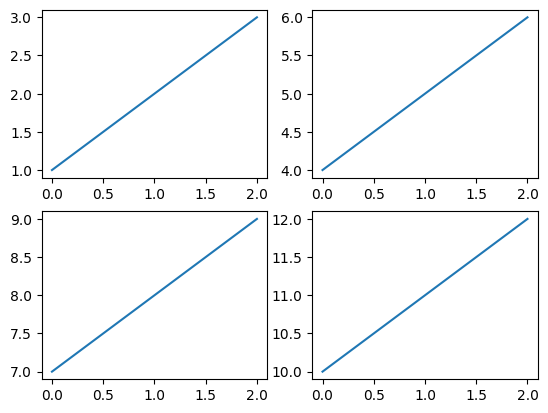

In [20]:
# plt.subplot()으로 하나씩 그리기

plt.subplot(2, 2, 1) # 2행 2열 첫 번째 위치: (nrows, ncols, index)
plt.plot([1, 2, 3])

plt.subplot(2, 2, 2)
plt.plot([4, 5, 6])

plt.subplot(2, 2, 3)
plt.plot([7, 8, 9])

plt.subplot(2, 2, 4)
plt.plot([10, 11, 12])
plt.show()

In [22]:
# 전처리
# 각 부모와 자녀의 수에 따른 생존자와 사망자 수 계산
titanic = pd.read_csv('titanic_selena.csv')

parch_counts = titanic.groupby('Parch')['Survived'].value_counts().unstack().fillna(0)
parch_counts

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,0.0
5,4.0,1.0
6,1.0,0.0


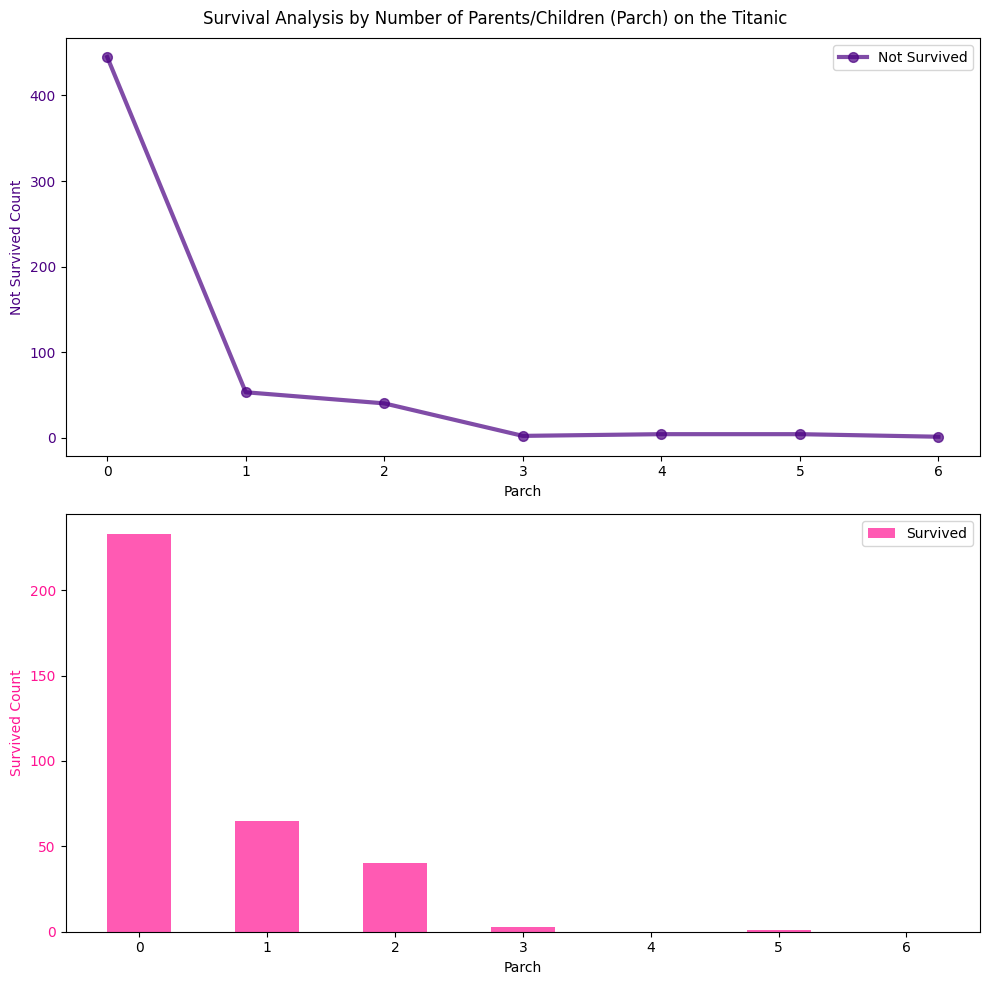

In [25]:
x = parch_counts.index.astype(str) # 데이터 프레임 인덱스 문자열 반환
y1 = parch_counts[0].values # 사망자
y2 = parch_counts[1].values # 생존자

plt.figure(figsize=(10, 10))

# 첫 번째 subplot
plt.subplot(2, 1, 1)

# 선 그래프
plt.plot(x, y1, '-o', color='indigo', markersize=7, linewidth=3, alpha=0.7, label='Not Survived')
plt.xlabel('Parch')
plt.ylabel('Not Survived Count', color='indigo')
plt.tick_params(axis='y', labelcolor='indigo')
plt.legend(loc='upper right')

# 두 번째 subplot
plt.subplot(2, 1, 2)

# 막대 그래프
plt.bar(x, y2, color='deeppink', alpha=0.7, width=0.5, label='Survived')
plt.xlabel('Parch')
plt.ylabel('Survived Count', color='deeppink')
plt.tick_params(axis='y', labelcolor='deeppink')
plt.legend(loc='upper right')

plt.suptitle('Survival Analysis by Number of Parents/Children (Parch) on the Titanic')
plt.tight_layout() # 간격 자동 조정
plt.show()

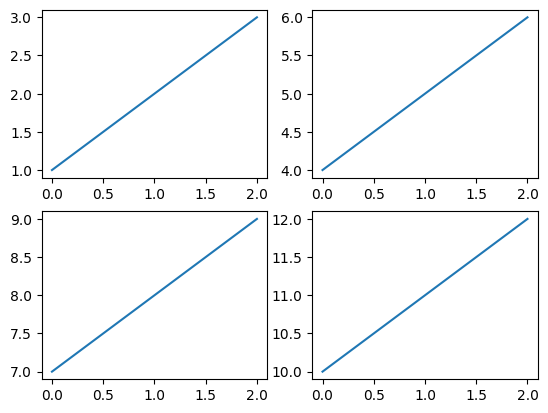

In [26]:
# 동시에 그리기
fig, axes = plt.subplots(2, 2) # 2행 2열의 subplot, fig: 전체 그림, axes: 각각의 개별 그래프 영역

axes[0, 0].plot([1, 2, 3]) # 0, 0 자리에 1, 2, 3 그래프
axes[0, 1].plot([4, 5, 6])
axes[1, 0].plot([7, 8, 9])
axes[1, 1].plot([10, 11, 12])
plt.show()

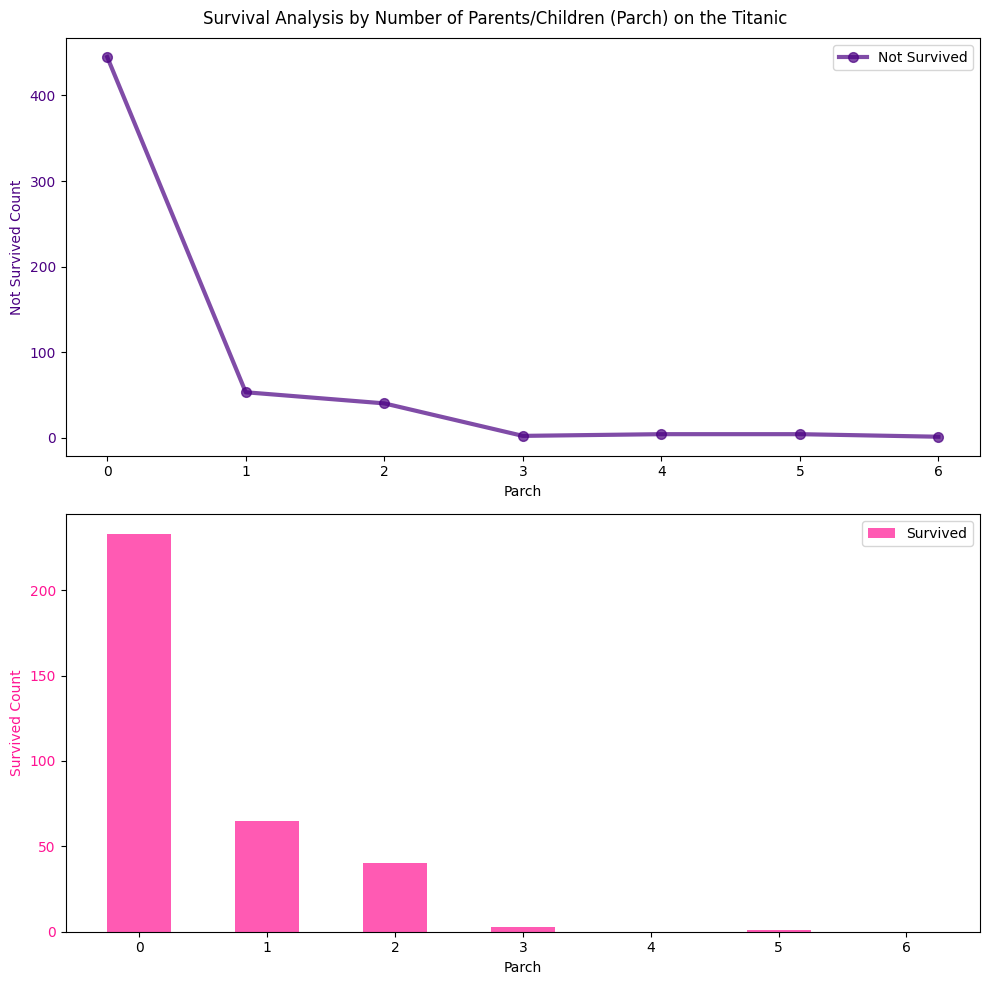

In [29]:
# 위의 셀과 동일한 x, y1, y2 사용 (정의 생략)

# plt.subplots() 함수
fig, axes = plt.subplots(2, 1, figsize=(10, 10)) # 열이 하나이기 때문에 axes 사용할 때 열의 번호 지정하지 않아도 됨

# 첫 번째 서브플롯 (선 그래프)
axes[0].plot(x, y1, '-o', color='indigo', markersize=7, linewidth=3, alpha=0.7, label='Not Survived')
axes[0].set_xlabel('Parch')
axes[0].set_ylabel('Not Survived Count', color='indigo')
axes[0].tick_params(axis='y', labelcolor='indigo')
axes[0].legend(loc='upper right')

# 두 번째 서브플롯 (막대 그래프)
axes[1].bar(x, y2, color='deeppink', alpha=0.7, width=0.5, label='Survived')
axes[1].set_xlabel('Parch')
axes[1].set_ylabel('Survived Count', color='deeppink')
axes[1].tick_params(axis='y', labelcolor='deeppink')
axes[1].legend(loc='upper right')

fig.suptitle('Survival Analysis by Number of Parents/Children (Parch) on the Titanic')
fig.tight_layout()
plt.show()

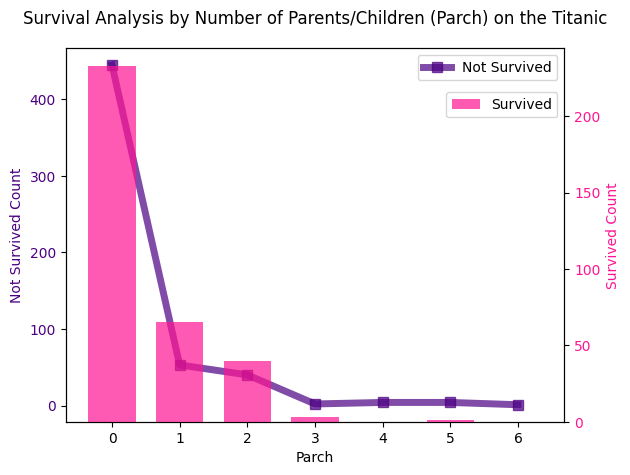

In [30]:
# 두 개의 그래프를 한 곳에
# 마찬가지로 x, y1, y2 사용

fig, ax1 = plt.subplots() # 그래프가 하나이기 때문에 위치 지정하지 않아도 됨

# 첫 번째 그래프 (선 그래프)
ax1.plot(x, y1, '-s', color='indigo', markersize=7, linewidth=5, alpha=0.7, label='Not Survived')
ax1.set_xlabel('Parch') # x축의 레이블
ax1.set_ylabel('Not Survived Count', color='indigo') # y축의 레이블
ax1.tick_params(axis='y', labelcolor='indigo') # 눈금의 모양과 속성
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1)) # 범례

# .twinx() 함수로 그래프 축 공유(이중 축)
ax2 = ax1.twinx()

# 두 번째 그래프 (막대 그래프)
ax2.bar(x, y2, color='deeppink', alpha=0.7, width=0.7, label='Survived')
ax2.set_ylabel('Survived Count', color='deeppink') # y축에 레이블 추가
ax2.tick_params(axis='y', labelcolor='deeppink')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))


plt.suptitle('Survival Analysis by Number of Parents/Children (Parch) on the Titanic')
plt.tight_layout()
plt.show()

# 다른 종류의 데이터를 한 축에 넣었으므로 좋은 시각화는 아니다.

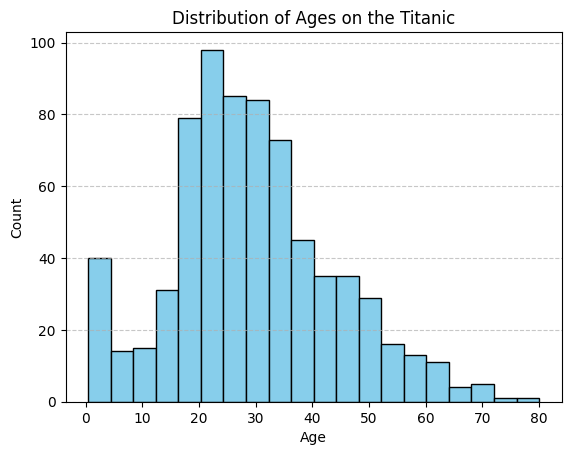

In [31]:
# 그래프를 이미지로 저장

# 히스토그램 그리기
plt.hist(titanic['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages on the Titanic')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('/content/histogram.jpg', format='jpg') # 저장(구글 코랩 디렉토리: /content/)

# **SeaBorn**

In [32]:
import seaborn as sns

In [36]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


***연속형 변수***

연속형 변수는 일반적으로 양적인 정보를 제공하며 측정 가능한 크기나 양을 가짐

***범주형 변수***

범주형 변수는 명목형과 순서형 두가지 유형으로 나뉨   
명목형 변수는 서로 구별되는 범주를 가짐    
범주형 변수는 주로 범주 간의 차이나 순서에 대한 정보를 제공함  



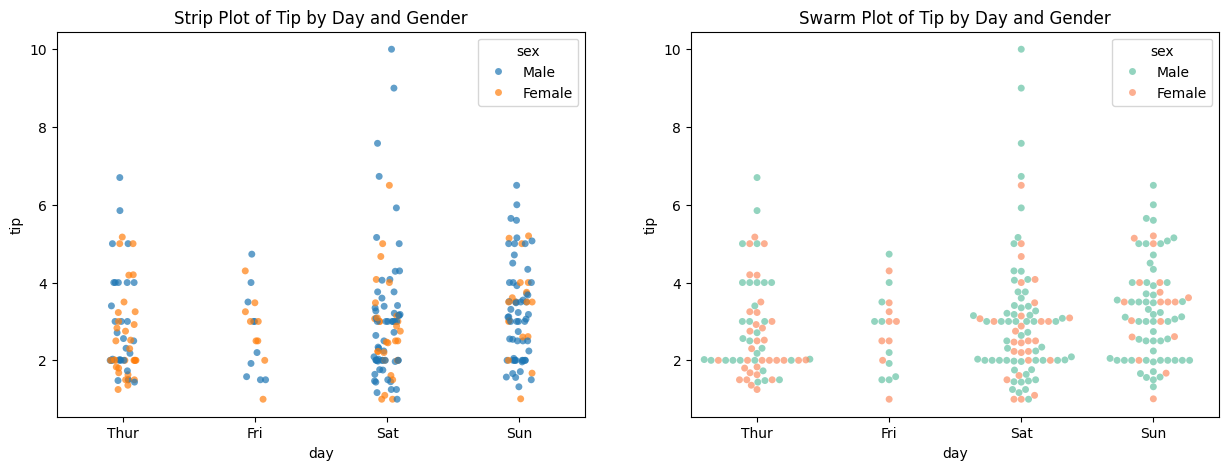

In [38]:
import matplotlib.pyplot as plt

# 팁 데이터셋 불러오기
tips = sns.load_dataset('tips')

# figure에 2개의 서브 플롯을 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# stripplot( ) 그리기
sns.stripplot(x='day', y='tip', hue='sex', data=tips, alpha=0.7, ax=ax1) # hue='': ''안에 있는 것에 따라 색을 다르게 지정해준다.

# swarmplot( ) 그리기
sns.swarmplot(x='day', y='tip', hue='sex', data=tips, palette='Set2', alpha=0.7, ax=ax2) # 사용하는 축의 값이 같으면 따로 지정해주지 않아도 자동 설정

ax1.set_title('Strip Plot of Tip by Day and Gender')
ax2.set_title('Swarm Plot of Tip by Day and Gender')
plt.show()

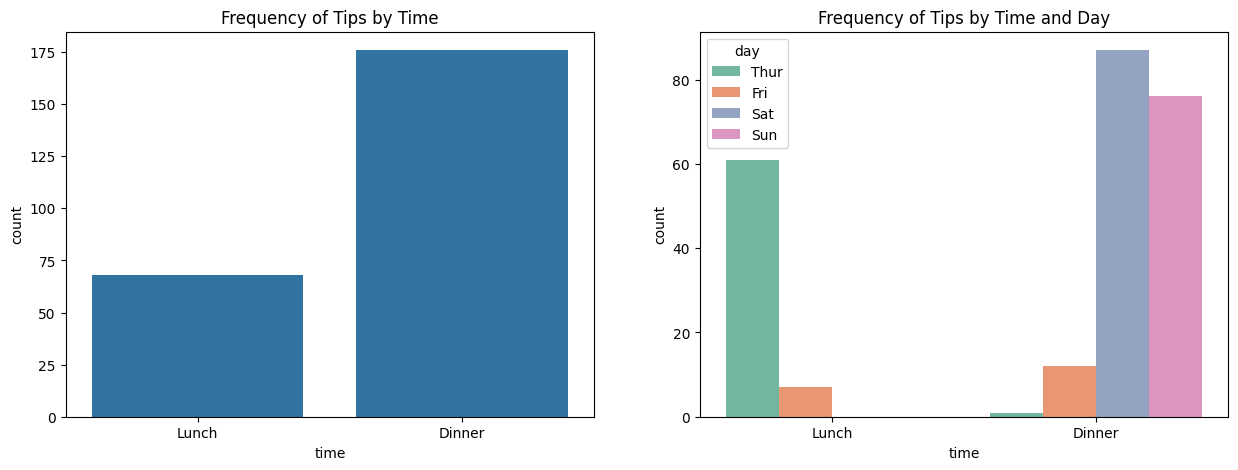

In [41]:
# figure에 2개의 서브 플롯을 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1) # 1행 2열 첫 번째 자리
ax2 = fig.add_subplot(1, 2, 2) # 1행 2열 두 번째 자리

# 식사가 이루어진 시간대 파악
# x축 변수, 데이터셋, axe 객체(1번째 그래프)
sns.countplot(x='time', data=tips, ax=ax1) #x축 변수의 개수를 countplot이 자동으로 세어주기 때문에 y축 지정이 필요 없다.

# 식사가 이루어진 시간대 파악과 식사가 이루어진 요일로 색상 분류
# x축 변수, hue로 색상 분류, 데이터 셋, 색상 설정, axe 객체(2번째 그래프)
sns.countplot(x='time', hue='day', data=tips, palette='Set2', ax=ax2) # hue 인자값을 넣어줌으로서 day별로 다르게 표시되도록 함

# 서브 플롯의 제목 설정
ax1.set_title('Frequency of Tips by Time')
ax2.set_title('Frequency of Tips by Time and Day')
plt.show()

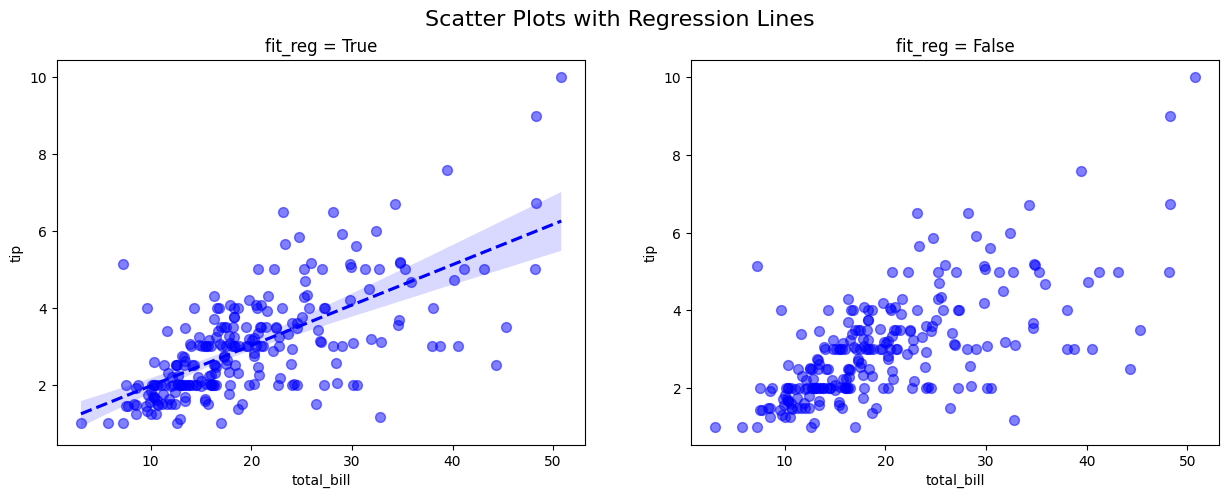

In [42]:
# 회귀선 포함한 산점도 - 회귀분석을 안해도 그려준다!

# figure에 2개의 서브 플롯을 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1) # 첫 번째 자리
ax2 = fig.add_subplot(1, 2, 2) # 두 번째 자리

# 첫 번째 자리: 산점도에 선형 회귀선 표시(fit_reg=True)
sns.regplot(x='total_bill', y='tip', data=tips, color='blue', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'linestyle': '--'}, ax=ax1)

# 두 번째 자리: 산점도에 선형 회귀선 미표시(fit_reg=False)
sns.regplot(x='total_bill', y='tip', data=tips, color='blue', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'linestyle': '--'}, ax=ax2, fit_reg=False)

fig.suptitle('Scatter Plots with Regression Lines', fontsize=16)
ax1.set_title('fit_reg = True')
ax2.set_title('fit_reg = False')
plt.show()

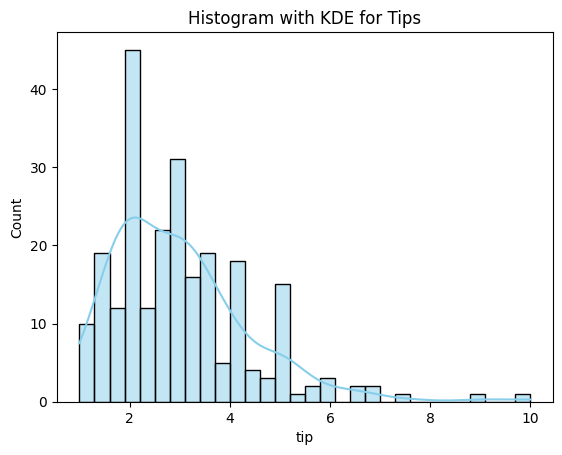

In [43]:
# hisplot() 함수
# 히스토그램과 커널 밀도 추정 그래프 함께 그리기
sns.histplot(tips['tip'], bins=30, kde=True, color='skyblue') #kde: 밀도 추정 그래프 -> 정규 분포인지 확인하거나 왜도를 체크할 때 주로 사용

# 제목 설정
plt.title('Histogram with KDE for Tips')
plt.show()

**Joint 그래프**   
두 수치형 변수의 결합 분포를 산점도와 히스토그램으로 함께 시각화하여 데이터 간의 관계 확인

jointplot()의 매개변수
- x, y
- data : dataset 지정
- kind : 결합 플롯 유형 지정 (scatter, hex, reg, resid 등)

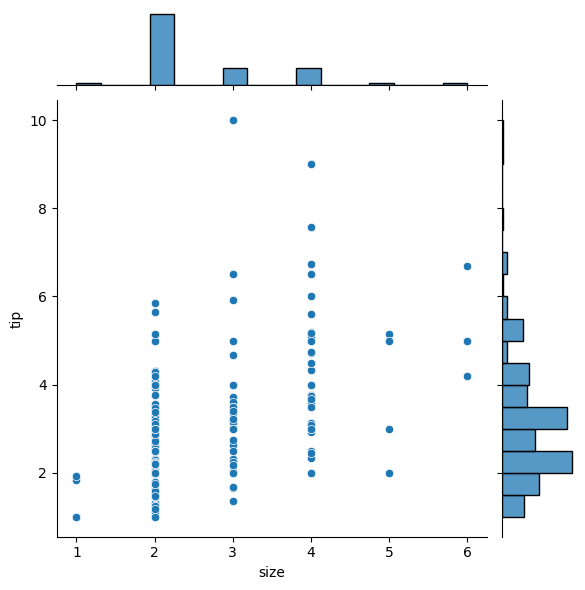

In [44]:
# jointplot()
# 조인트 그래프: 산점도 + 히스토그램 동시 시각화
sns.jointplot(x='size', y='tip', data=tips, kind='scatter')
plt.show()

**관계 그래프**   
여러 변수 간의 관계를 시각화하는 다중 플롯 그래프, 변수들 간의 상관관계 확인

- 인자로 전달되는 데이터프레임의 열(변수)를 두 개씩 짝 지을 수 있는 모든 조합에 대해서 표현
- 열은 정수/실수형이어야 함
- 3개의 열이라면 3행 X 3열의 크기로 모두 9개의 그리드 생성
- 각 그리드의 두 변수 간의 관계를 나타내는 그래프를 하나씩 그림
- 같은 변수끼리 짝을 이루는 대각선 방향으로는 히스토그램 시각화
- 서로 다른 변수 간에는 산점도 시각화



pairplot() 함수 매개변수
- data: dataset 지정
- hue: data의 카테고리 변수를 기준으로 색상을 다르게 표시하여 그룹 간의 차이를 시각화
- diag_kind: 대각선에 나타낼 그래프의 종류를 선택   
   - auto : 기본값, 각 변수의 분포를 히스토그램으로 시각화
   - hist:  히스토그램 시각화
   - kde: 커널 밀도 추정 그래프 시각화
   - None: 대각선에 아무런 그래프도 표시하지 않음

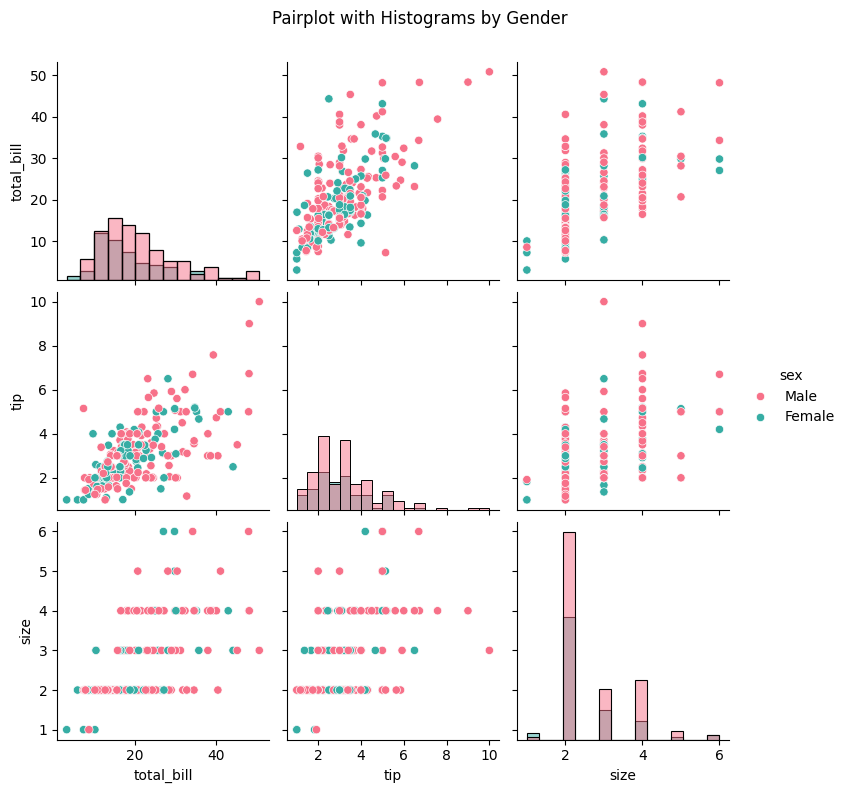

In [46]:
# 관계 그래프
# pairplot( ) 그리기
sns.pairplot(data=tips, hue='sex', diag_kind='hist', palette='husl') # 대각선에 나타낼 그래프 = 히스토그램 지정

# 제목 설정
plt.suptitle('Pairplot with Histograms by Gender', y=1.05)
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

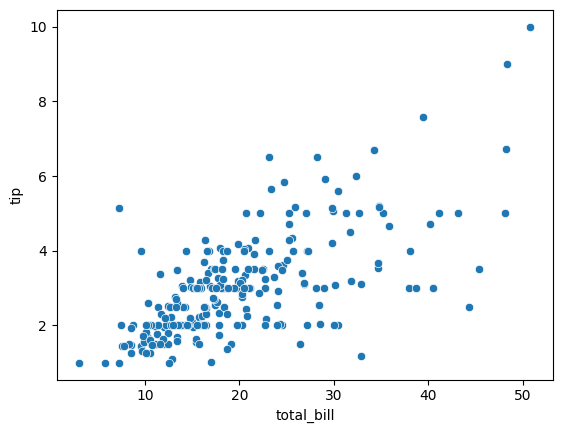

In [45]:
tips

sns.scatterplot(data=tips, x='total_bill', y='tip')